# Import plaintext

In [1]:
from tqdm.notebook import trange
NumTraces = 238

In [2]:
import pathlib
import numpy as np
pt = []
for path in pathlib.Path("../../joules-swaes-picochip").iterdir():
    if path.is_file():
        current_file = open(path, "r")
        for i in range (NumTraces):
            a = current_file.readline()
            pt.append(a)
        current_file.close()
#pt.sort()

In [3]:
pt_array = []
for i in range (len(pt)):
    b = bytes.fromhex(pt[i])
    one_array = np.frombuffer(b,dtype=np.uint8)
    pt_array.append(one_array)
print(len(pt_array))
print(len(pt_array[0]))

238
16


# Import key

In [4]:
key_array = []
key = 'f0debc9a78563412efcdab8967452301'
for i in range (NumTraces):
    b = bytes.fromhex(key)
    one_array = np.frombuffer(b,dtype=np.uint8)
    key_array.append(one_array)
print(len(key_array))
print(len(key_array[0]))

238
16


# Import traces

In [5]:
import glob
import matplotlib.pylab as plt
NumofTraces = NumTraces
strx = []
stry = []
floatx = []
floaty = []
path = "../../joules-swaes-picochip/report_1000samples/*.data"  #### edit here
#path = "../../Downloads/pico_coaes_512/gate/picoaes_tsmc180_200_sca_trace_0_plot.png.data"
for filename in sorted(glob.glob(path, recursive=True),key = lambda x: x[-20:]):
    print(filename)
    with open(filename, 'r') as f:
        next(f)
        for a,line in enumerate(f):
            row = line.split()
            if row:
                strx.append(row[-2])
                stry.append(row[-1])
            if a == 999:  #### edit here, crop the extra points 
                break
                
for i in range (len(stry)):
    floatx.append(float(strx[i]))
    floaty.append(float(stry[i]))
floatx = np.hstack(floatx)
floaty = np.hstack(floaty)
trace_array_x = np.array_split(floatx, NumofTraces)
trace_array_y = np.array_split(floaty, NumofTraces)

print(len(trace_array_y))
print(len(trace_array_y[0]))

../../joules-swaes-picochip/report_1000samples/aes_gtl_0_plot.png.data
../../joules-swaes-picochip/report_1000samples/aes_gtl_1_plot.png.data
../../joules-swaes-picochip/report_1000samples/aes_gtl_2_plot.png.data
../../joules-swaes-picochip/report_1000samples/aes_gtl_3_plot.png.data
../../joules-swaes-picochip/report_1000samples/aes_gtl_4_plot.png.data
../../joules-swaes-picochip/report_1000samples/aes_gtl_5_plot.png.data
../../joules-swaes-picochip/report_1000samples/aes_gtl_6_plot.png.data
../../joules-swaes-picochip/report_1000samples/aes_gtl_7_plot.png.data
../../joules-swaes-picochip/report_1000samples/aes_gtl_8_plot.png.data
../../joules-swaes-picochip/report_1000samples/aes_gtl_9_plot.png.data
../../joules-swaes-picochip/report_1000samples/aes_gtl_10_plot.png.data
../../joules-swaes-picochip/report_1000samples/aes_gtl_11_plot.png.data
../../joules-swaes-picochip/report_1000samples/aes_gtl_12_plot.png.data
../../joules-swaes-picochip/report_1000samples/aes_gtl_13_plot.png.data
..

238
1000


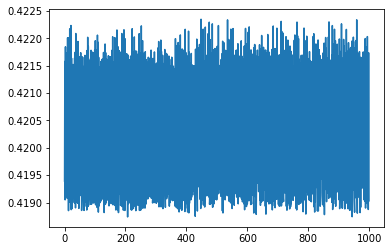

In [6]:
plt.plot(trace_array_y[0])

In [7]:
trace_array_y = np.array(trace_array_y)
print(len(pt_array))
print(len(key_array))
print(len(trace_array_y))
print(len(trace_array_y[0]))

238
238
238
1000


# SBox

In [8]:
sbox = (
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16)

def intermediate(pt, keyguess):
    return sbox[pt ^ keyguess]

# Hamming Weight Leakage Model

In [9]:
HW = [bin(n).count("1") for n in range(0, 256)]

def calculate_diffs(guess, byteindex):

    one_list_calc = []
    zero_list_calc = []

    for trace_index in range(len(trace_array_y)):
        hypothetical_leakage = intermediate(guess, pt_array[trace_index][byteindex])
        #st1 = pt_array[trace_index][byteindex] ^ guess
        #st2 = sbox[st1]
        #hypothetical_leakage = st1 ^ st2
        
        if (HW[hypothetical_leakage] > 4 ):
            one_list_calc.append(trace_array_y[trace_index])
        elif (HW[hypothetical_leakage] < 4):
            zero_list_calc.append(trace_array_y[trace_index])

    one_avg_calc = np.asarray(one_list_calc).mean(axis=0)
    zero_avg_calc = np.asarray(zero_list_calc).mean(axis=0)
    return abs(one_avg_calc - zero_avg_calc)

# DPA Attack

In [20]:
key_guess = []
full_diffs_list = []
known_key = key_array[0]

for subkey in trange(0, 16):
    max_diffs = [0]*256
    full_diffs = [0]*256
    for guess in trange(0, 256):
        full_diff_trace = calculate_diffs(guess, subkey)
        max_diffs[guess] = np.max(full_diff_trace)
        full_diffs[guess] = full_diff_trace
        
    #Make copy of the list
    full_diffs_list.append(full_diffs[:])

    #Get argument sort, as each index is the actual key guess.
    sorted_args = np.argsort(max_diffs)[::-1]

    #Keep most likely
    key_guess.append(sorted_args[0])

    #Print results
    print("Subkey %2d - most likely %02X (actual %02X)"%(subkey, key_guess[subkey], known_key[subkey]))

    #Print other top guesses
    print(" Top 5 guesses: ")
    for i in range(0, 5):
        g = sorted_args[i]
        print("   %02X - Diff = %f"%(g, max_diffs[g]))

    print("\n")

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  0 - most likely 66 (actual F0)
 Top 5 guesses: 
   66 - Diff = 0.000616
   CF - Diff = 0.000566
   F1 - Diff = 0.000557
   D4 - Diff = 0.000513
   D1 - Diff = 0.000512




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  1 - most likely E9 (actual DE)
 Top 5 guesses: 
   E9 - Diff = 0.000816
   F6 - Diff = 0.000769
   30 - Diff = 0.000698
   5F - Diff = 0.000671
   64 - Diff = 0.000641




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  2 - most likely 1E (actual BC)
 Top 5 guesses: 
   1E - Diff = 0.000665
   9A - Diff = 0.000543
   53 - Diff = 0.000528
   D6 - Diff = 0.000521
   A2 - Diff = 0.000507




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  3 - most likely CA (actual 9A)
 Top 5 guesses: 
   CA - Diff = 0.000620
   56 - Diff = 0.000506
   3A - Diff = 0.000499
   30 - Diff = 0.000490
   BA - Diff = 0.000446




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  4 - most likely 2C (actual 78)
 Top 5 guesses: 
   2C - Diff = 0.000616
   FC - Diff = 0.000558
   2F - Diff = 0.000541
   28 - Diff = 0.000527
   43 - Diff = 0.000519




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  5 - most likely EB (actual 56)
 Top 5 guesses: 
   EB - Diff = 0.000742
   C4 - Diff = 0.000713
   FE - Diff = 0.000564
   B1 - Diff = 0.000550
   01 - Diff = 0.000523




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  6 - most likely 20 (actual 34)
 Top 5 guesses: 
   20 - Diff = 0.000622
   46 - Diff = 0.000610
   A2 - Diff = 0.000538
   7F - Diff = 0.000532
   13 - Diff = 0.000532




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  7 - most likely 09 (actual 12)
 Top 5 guesses: 
   09 - Diff = 0.000612
   80 - Diff = 0.000591
   E4 - Diff = 0.000486
   35 - Diff = 0.000471
   53 - Diff = 0.000443




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  8 - most likely 8F (actual EF)
 Top 5 guesses: 
   8F - Diff = 0.000658
   E2 - Diff = 0.000624
   C8 - Diff = 0.000597
   1D - Diff = 0.000594
   C6 - Diff = 0.000573




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  9 - most likely 20 (actual CD)
 Top 5 guesses: 
   20 - Diff = 0.000643
   CE - Diff = 0.000627
   1E - Diff = 0.000601
   7A - Diff = 0.000596
   EA - Diff = 0.000517




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 10 - most likely 06 (actual AB)
 Top 5 guesses: 
   06 - Diff = 0.000599
   35 - Diff = 0.000564
   2C - Diff = 0.000471
   26 - Diff = 0.000468
   DB - Diff = 0.000467




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 11 - most likely EF (actual 89)
 Top 5 guesses: 
   EF - Diff = 0.000596
   98 - Diff = 0.000553
   ED - Diff = 0.000533
   6A - Diff = 0.000499
   E6 - Diff = 0.000465




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 12 - most likely 39 (actual 67)
 Top 5 guesses: 
   39 - Diff = 0.000656
   8E - Diff = 0.000645
   06 - Diff = 0.000613
   17 - Diff = 0.000580
   5A - Diff = 0.000558




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 13 - most likely BC (actual 45)
 Top 5 guesses: 
   BC - Diff = 0.000514
   EF - Diff = 0.000477
   6E - Diff = 0.000476
   C1 - Diff = 0.000451
   F4 - Diff = 0.000450




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 14 - most likely EC (actual 23)
 Top 5 guesses: 
   EC - Diff = 0.000574
   A3 - Diff = 0.000563
   52 - Diff = 0.000554
   DA - Diff = 0.000531
   1F - Diff = 0.000517




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 15 - most likely 5C (actual 01)
 Top 5 guesses: 
   5C - Diff = 0.000586
   D8 - Diff = 0.000538
   AB - Diff = 0.000533
   AF - Diff = 0.000473
   B5 - Diff = 0.000465




# How Many Traces Needed for HW DPA

In [10]:
traces_enc_full = trace_array_y
print(len(traces_enc_full))

238


In [11]:
text_arrays_full = pt_array
print(len(text_arrays_full))

238


In [12]:
def num_same(a, b):
    
    if len(a) != len(b):
        raise ValueError("Arrays must be same length!")
    
    #Count how many list items match up
    same = 0
    for i, _ in enumerate(a):
        if a[i] == b[i]:
            same += 1
    
    return same

In [14]:
full_key_guess = []
full_diffs_list = []
how_many_correct_keybytes = []
is_same = 0
known_key = key_array[0]
traces_enc = []
text_arrays = []

for traces in trange(50,238,50):
    x =  np.arange(50, 238, 50)
    traces_enc = np.array(traces_enc_full[0:traces])
    text_arrays = np.array(text_arrays_full[0:traces])
    
    key_guess = []
    diffs_list = []
    for subkey in trange(0, 16):
        max_diffs = [0]*256
        full_diffs = [0]*256
        for guess in range(0, 256):
            full_diff_trace = calculate_diffs(guess, subkey)
            max_diffs[guess] = np.max(full_diff_trace)
            full_diffs[guess] = full_diff_trace
        
        diffs_list.append(full_diffs[:])
        sorted_args = np.argsort(max_diffs)[::-1]
        key_guess.append(sorted_args[0])
    
    full_diffs_list.append(diffs_list)
    full_key_guess.append(key_guess)
    is_same = num_same(key_guess,known_key)
    how_many_correct_keybytes.append(is_same)
    
    print("For %2d traces, correct key byte are %2d" %(traces,is_same))
    print("\n")

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

For 50 traces, correct key byte are  0




  0%|          | 0/16 [00:00<?, ?it/s]

For 100 traces, correct key byte are  0




  0%|          | 0/16 [00:00<?, ?it/s]

For 150 traces, correct key byte are  0




  0%|          | 0/16 [00:00<?, ?it/s]

For 200 traces, correct key byte are  0




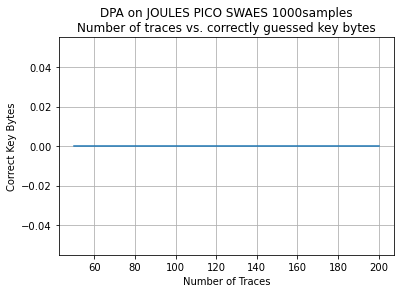

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

# need to make adjustment here for further experienments
# here x is 45 because we run 45 intervals of traces from 5 to 230 with incresing step of 5
### edit below
#x = np.arange(2,45,2) 
### edit above

plt.plot(x, how_many_correct_keybytes)
plt.grid()
plt.xlabel('Number of Traces')
plt.ylabel('Correct Key Bytes')
############################################## edit here
plt.title('DPA on JOULES PICO SWAES 1000samples\nNumber of traces vs. correctly guessed key bytes')
plt.savefig('1000s_correct_bytes_vs_traces.jpg',dpi=100) # save jpg/png

In [16]:
### take the max correct 16 subkeys out of the 45 experienments 
### so it is a 45x16x1 matrix for the correct key guess 1/256
### 45x16x255 matrix for the rest of the guesses keybyte

correct_full_list = []  #45x16x1
else_full_list = []  #45x16x255

for i in range (len(how_many_correct_keybytes)):
    correct_16_subbyte_list = []  #16x1
    else_16_subbyte_list = []  #16x255
    
    for subkey in range (16):
        max_correct = []  #1
        max_else = []  #255
        
        for guess in range(0, 256):  #take the max correlation of the correct key guess 
            if (guess == known_key[subkey]):
                ### edit below -- the list name need to be change for the especific name 
                corr = full_diffs_list[i][subkey][guess] 
                ### edit above -- the list name need to be change for the especific name 
                ymax = corr.max()
                max_correct.append(ymax)
            else:
                corr = full_diffs_list[i][subkey][guess]
                ymax = corr.max()
                max_else.append(ymax)
                
        correct_16_subbyte_list.append(max_correct)
        
        else_16_subbyte_list.append(max_else)
        
    correct_full_list.append(correct_16_subbyte_list)
    
    else_full_list.append(else_16_subbyte_list)

print(len(correct_full_list))
print(len(correct_full_list[0]))
print(len(correct_full_list[0][0]))
print(len(else_full_list))
print(len(else_full_list[0]))
print(len(else_full_list[0][0]))

4
16
1
4
16
255


In [17]:
### make the correct key correlation to 16x45x1 matrix

corr_plot_full = []
for i in range (16):
    corr_plot = []
    for j in range (len(how_many_correct_keybytes)):
        corr_plot.append(correct_full_list[j][i])  ## invert the i and j 
    corr_plot_full.append(corr_plot)

In [18]:
### make the else key correlation to 16x255x45 matrix

else_16 = []
for i in range (16):
    else_255 = []
    for j in range (len(else_full_list[0][0])):
        else_list = []
        for k in range (len(how_many_correct_keybytes)):
            else_list.append(else_full_list[k][i][j])  ## invert the i, j and k 
        else_255.append(else_list)
    else_16.append(else_255)

<Figure size 432x288 with 0 Axes>

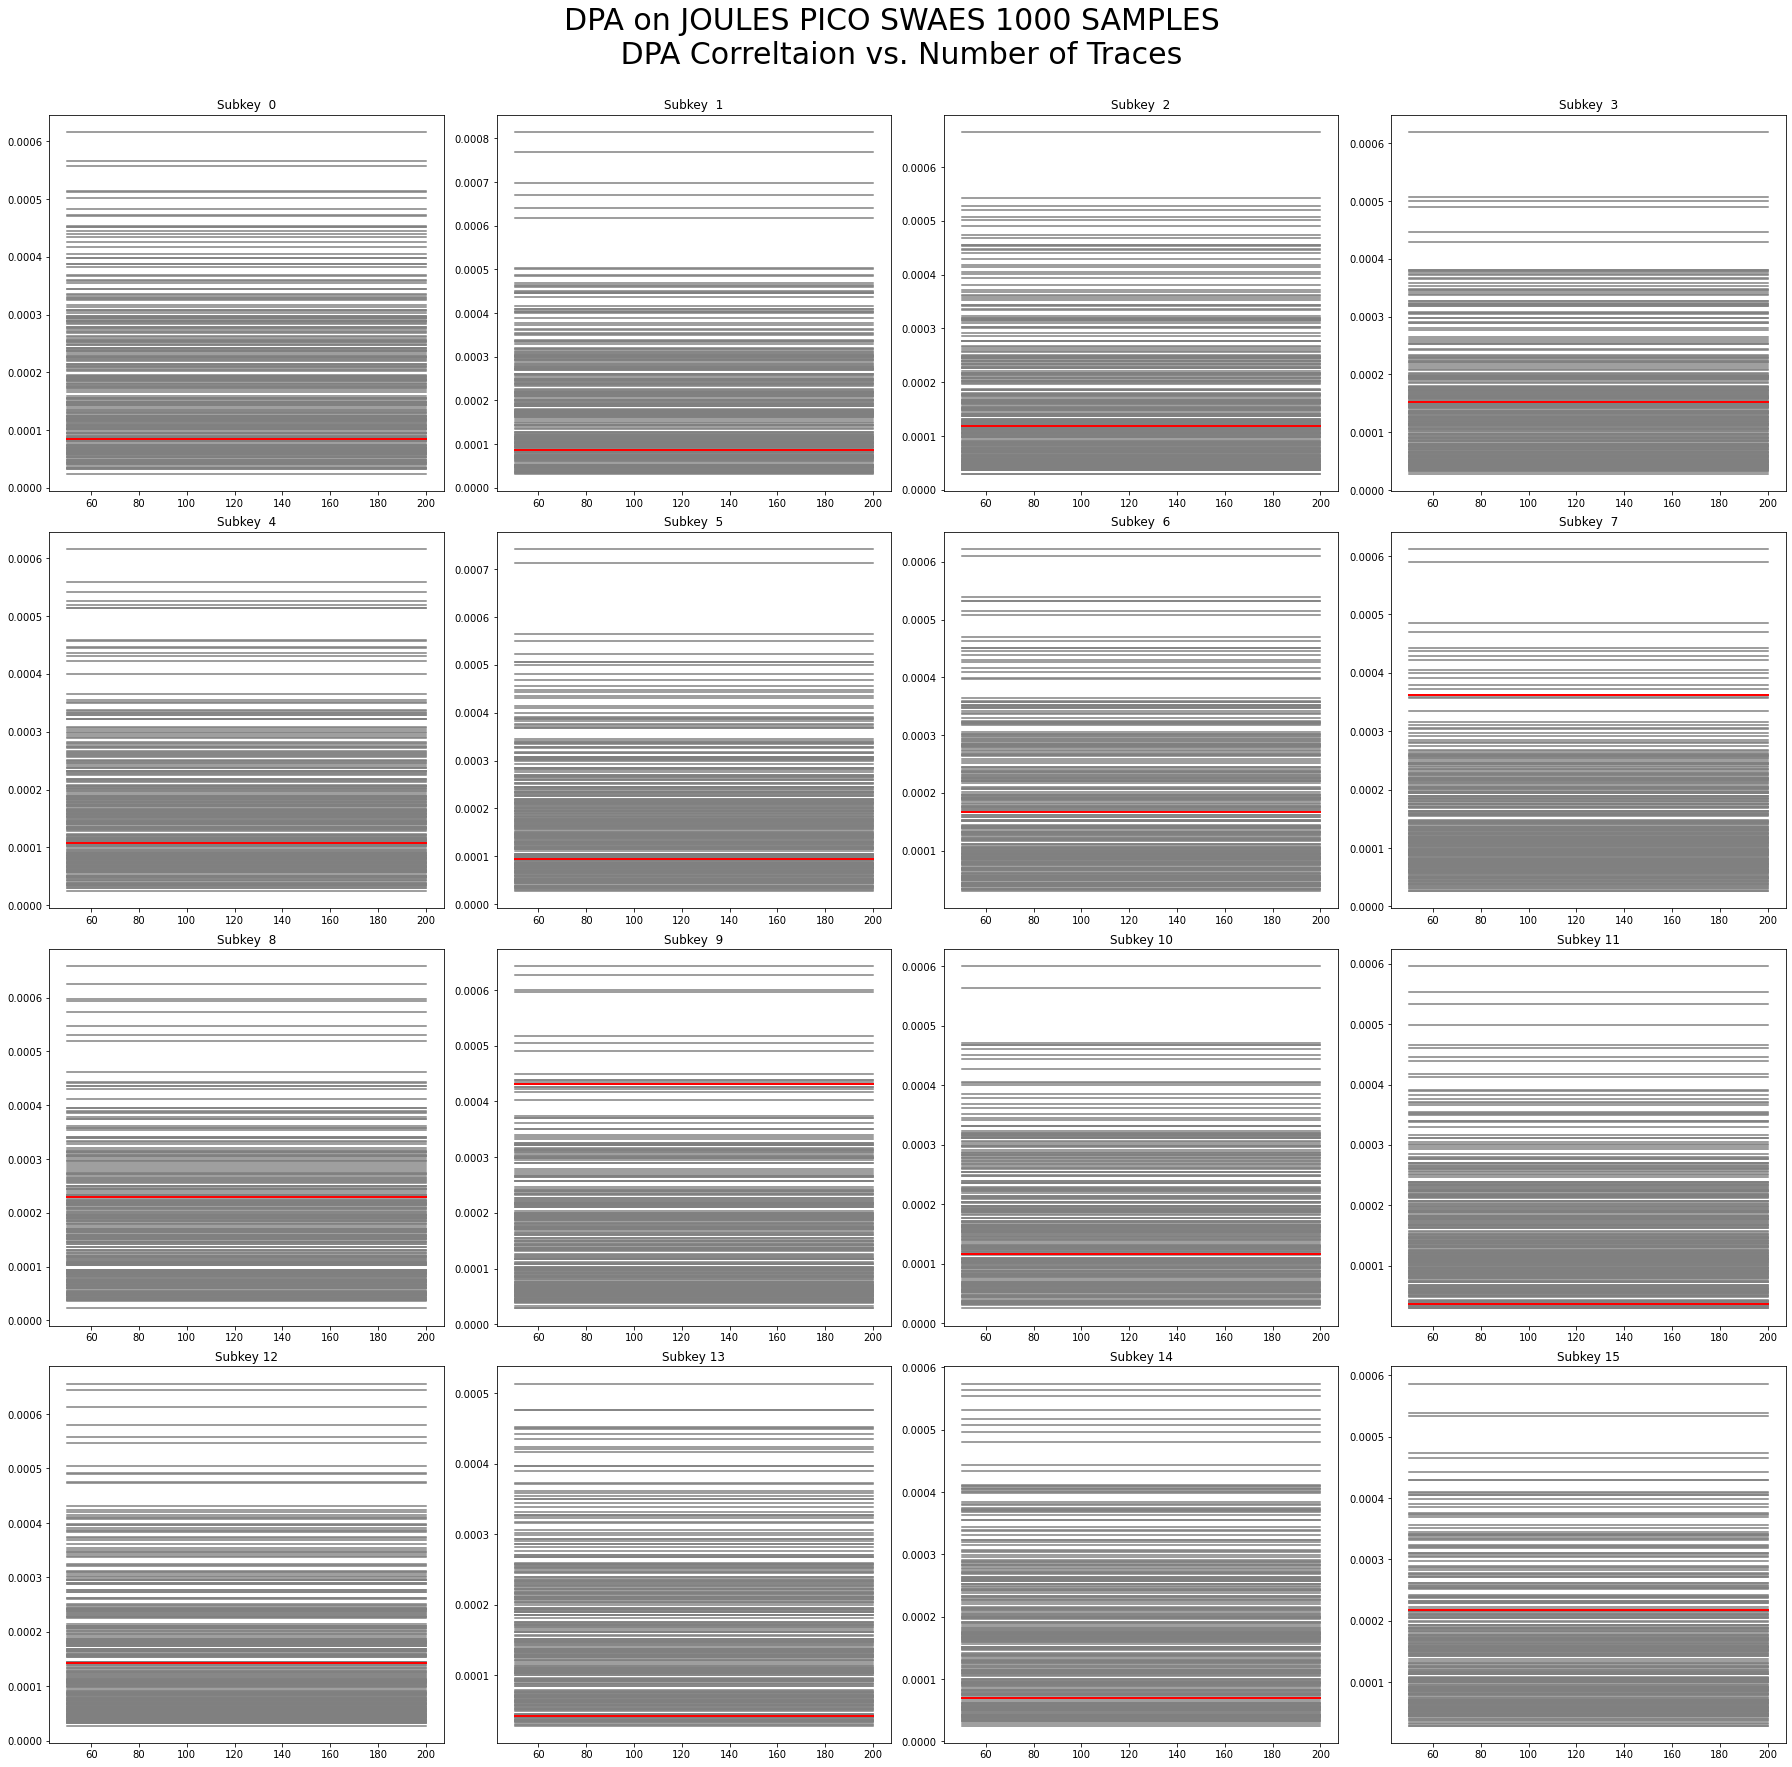

In [19]:
### plot a 16 subplot, 16 subkeys
### each subkeys has 255 guesses 
### each guesses has 45 points in this experienment

import pylab

import warnings  #ignore the subplot warmings of pylab.subplot(4,4,subkey+1)
warnings.filterwarnings('ignore')

plt.figure()

f, axs = plt.subplots(4,4,figsize=(25,25))  #making a 4x4 subplot, figsize 25x25

for subkey in range (16):
    for guess in range (len(else_16[0])):
        pylab.subplot(4,4,subkey+1)  # marking the position of each subplot
        ### edit below, different experienment needs different xaxis
        #x = np.arange(5, 230, 5)  
        ### edit above
        y = else_16[subkey][guess]  #plotting the 255 guesses
        plt.plot(x,y,color='grey')  #set wrong guesses as grey
        y1 = corr_plot_full[subkey]  #plotting the correct 1 guesses
        plt.plot(x,y1,color='red',linewidth=1.5, linestyle='-',zorder=255)  #set correct guesses as red
        plt.title('Subkey %2d' %(subkey))
        
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('DPA on JOULES PICO SWAES 1000 SAMPLES \n DPA Correltaion vs. Number of Traces', size=30)

plt.savefig('1000s_corr_vs_traces.jpg',dpi=100)  
            
plt.show()